In [1]:
from sklearn import datasets
import numpy as np

mnist = datasets.load_digits()
mnist['target'] = mnist['target'].astype(np.int)

In [2]:
from sklearn.model_selection import train_test_split

#Train test split
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.2, shuffle=True, random_state=3)

In [3]:
y_train_1 = (y_train == 1).astype(np.int)
y_test_1 = (y_test == 1).astype(np.int)

In [4]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train_1)

SVC()

In [5]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, X_train, y_train_1, cv = 3, scoring = "accuracy")
print(scores)
print("Mean %0.2f"%scores.mean())
print("Dev %0.2f"%scores.std())

[0.99164927 0.99373695 1.        ]
Mean 1.00
Dev 0.00


In [6]:
y_pred = svm_clf.predict(X_train)

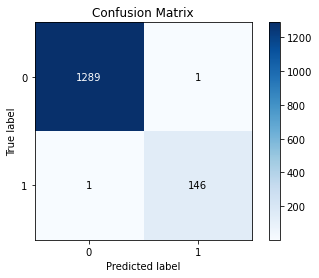

In [7]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_train_1, y_pred)

In [8]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(y_train_1, y_pred)
recall_score = recall_score(y_train_1, y_pred)
print('Precision Score: {:04.2f} Recall Score {:04.2f}'.format(precision_score,recall_score))

Precision Score: 0.99 Recall Score 0.99


#### Se si vuole utilizzare la cross_val_score con più di uno scoring si può utilizzare la funzione cross_validate

In [9]:
from sklearn.model_selection import cross_validate
cross_validate(svm_clf, X_train, y_train_1, cv = 3, scoring = ["accuracy",'precision','recall'])


{'fit_time': array([0.01400185, 0.01504326, 0.01099849]),
 'score_time': array([0.0059979 , 0.00695896, 0.01501966]),
 'test_accuracy': array([0.99164927, 0.99373695, 1.        ]),
 'test_precision': array([0.95918367, 0.96      , 1.        ]),
 'test_recall': array([0.95918367, 0.97959184, 1.        ])}